### Project begins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.loadtxt('data_total.txt')
print(data.shape)

(8400, 2500)


In [2]:
ss_classes = []
# Y = np.zeros([7*12*100,7*12])
# ct1 = 0
# ct2 = 0
# for ii in range(1,8):
#     for jj in range(1,13):
#         ss_classes.append(str(ii)+str(jj))
#         result = np.zeros([1,7])
#         result[0,ct1] = 1
#         ct1 += 1
#         for kk in range(1,101):
#             Y[ct2] = result
#             ct2 += 1

Y = np.zeros([7*12*100,7])
ct1 = -1
ct2 = 0
for ii in range(1,8):
    ct1 += 1
    for jj in range(1,13):
        ss_classes.append(str(ii)+str(jj))
        result = np.zeros([1,7])
        result[0,ct1] = 1
        for kk in range(1,101):
            Y[ct2] = result
            ct2 += 1

In [3]:
X = data
y = Y
print(X.shape)
print(y.shape)

(8400, 2500)
(8400, 7)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [5]:
X_train_img = X_train.reshape(X_train.shape[0],50,50)/255.0

X_test_img = X_test.reshape(X_test.shape[0],50,50)/255.0

In [6]:
print(X_train_img.shape,y_train.shape)
print(X_test_img.shape,y_test.shape)

(7560, 50, 50) (7560, 7)
(840, 50, 50) (840, 7)


In [7]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import layers, models

### Determine the number of hidden layers

In [26]:
model = models.Sequential([

    layers.Conv2D(filters=64, kernel_size=(7, 7), strides=(1,1), activation='relu', input_shape=(50, 50,1)),
    
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),

    layers.Conv2D(filters=32, kernel_size=(7, 7), strides=(1,1), activation='relu'),

    layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),

    layers.Conv2D(filters=32, kernel_size=(7, 7), strides=(1,1), activation='relu'),
    
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 44, 44, 64)        3200      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 16, 16, 32)        100384    
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 2, 2, 32)          50208     
                                                                 
 flatten_10 (Flatten)        (None, 128)             

In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training set and validate on the test set
history = model.fit(X_train_img, y_train, epochs=10, batch_size = 64,
                    validation_data=(X_test_img, y_test))

Epoch 1/10
119/119 [==============================] - 10s 82ms/step - loss: 1.9471 - accuracy: 0.1418 - val_loss: 1.9467 - val_accuracy: 0.1345
Epoch 2/10
119/119 [==============================] - 10s 81ms/step - loss: 1.9461 - accuracy: 0.1401 - val_loss: 1.9466 - val_accuracy: 0.1345
Epoch 3/10
119/119 [==============================] - 10s 81ms/step - loss: 1.9461 - accuracy: 0.1378 - val_loss: 1.9468 - val_accuracy: 0.1345
Epoch 4/10
119/119 [==============================] - 10s 81ms/step - loss: 1.9461 - accuracy: 0.1429 - val_loss: 1.9464 - val_accuracy: 0.1214
Epoch 5/10
119/119 [==============================] - 10s 80ms/step - loss: 1.9463 - accuracy: 0.1422 - val_loss: 1.9465 - val_accuracy: 0.1345
Epoch 6/10
119/119 [==============================] - 10s 82ms/step - loss: 1.9460 - accuracy: 0.1390 - val_loss: 1.9466 - val_accuracy: 0.1214
Epoch 7/10
119/119 [==============================] - 10s 84ms/step - loss: 1.9460 - accuracy: 0.1396 - val_loss: 1.9468 - val_accuracy:

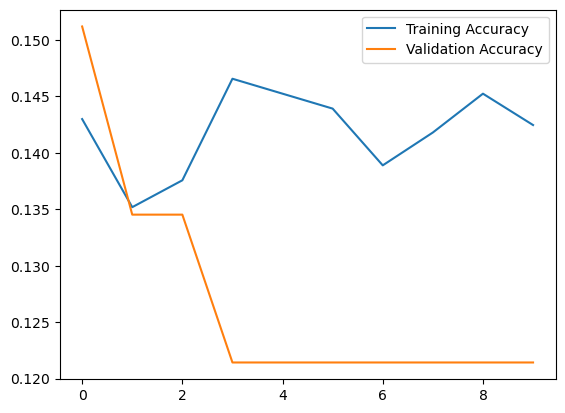

In [18]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()